# Mushroom use case

Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

# importing required libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# loading the dataset

In [49]:
df=pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing

In [50]:
mappings=list()

encoder =LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index,label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [51]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [52]:
pd.set_option('display.max_rows',None)

In [53]:
y=df['class']
x=df.drop('class',axis=1)

In [30]:
y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      0
35      0
36      0
37      1
38      0
39      0
40      0
41      0
42      0
43      1
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      1
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      1
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [54]:
scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
x

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

# Model Selection

In [58]:
log_model=LogisticRegression()
svm_model=SVC(C=1.0,kernel='rbf')
nn_model=MLPClassifier(hidden_layer_sizes=(128,128))

# Training

In [35]:
np.sum(y)/len(y)

0.48202855736090594

In [36]:
log_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
nn_model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [37]:
print(f"----Logistic Regression: {log_model.score(x_test,y_test)}")
print(f"-Support Vector Machine: {svm_model.score(x_test,y_test)}")
print(f"---------Neural Network: {nn_model.score(x_test,y_test)}")

----Logistic Regression: 0.9569230769230769
-Support Vector Machine: 1.0
---------Neural Network: 1.0


# Visualization

In [38]:
x_test.shape

(1625, 22)

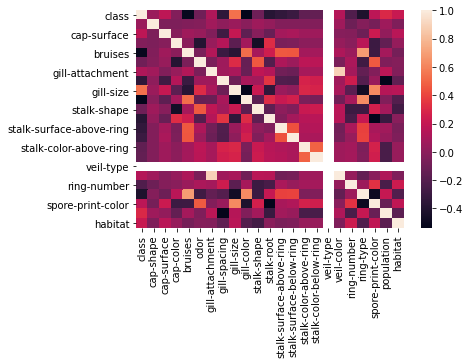

In [39]:
corr= df.corr()

sns.heatmap(corr)

In [40]:
df.shape

(8124, 23)

In [41]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [42]:
#statistical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [43]:
#checking the null values in the data set
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

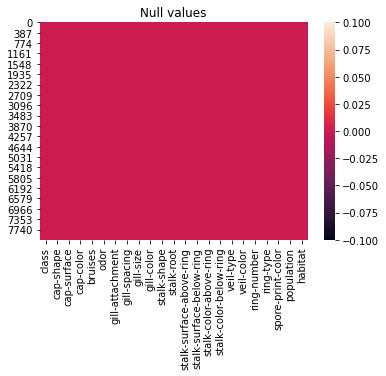

In [44]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

there are no null values in the dataset

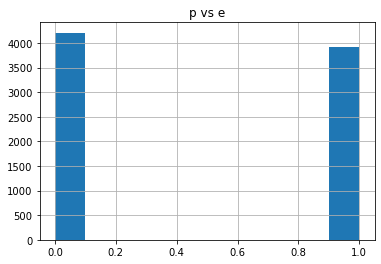

In [45]:
df["class"].hist(grid=True)  #Example of unvariate analysis
plt.title("p vs e")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


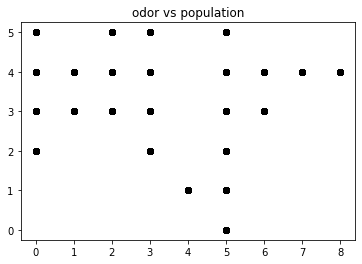

In [46]:
plt.scatter(df["odor"],df["population"],alpha=0.55,c=(0,0,0))  #Example of bivariate analysis
plt.title("odor vs population")
plt.show()

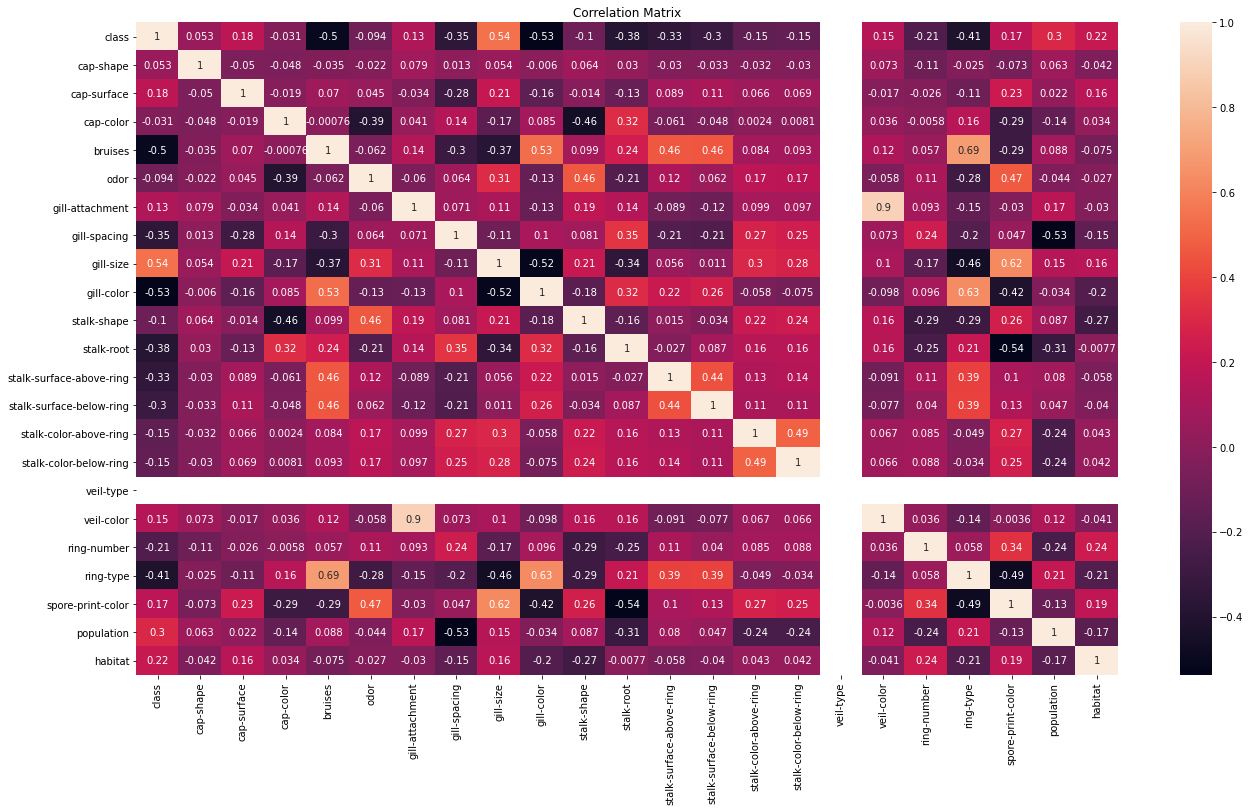

In [47]:
corr_mat=df.corr()    #Exxample of multi variate analysis

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()